In [2]:
from IPython.display import Image

## 1. About the data.

This data set contains various factors that influence predictions like Age, Sex, BP, Cholesterol levels, Na to Potassium Ratio and finally the drug type.
This dataset has the following features. 
* Age
* Sex
* Blood Pressure Levels (BP)
* Cholesterol Levels
* Na to Potassium Ration
* Target variable: Drug Type
The data set is spread amongst the following data set. Int, float and object.

## 2. Objectives.

By the end of this notebook, we would be able to:
* By the end of this notebook, we would be able to classifier drugs into any of the categories below using factors like sex, age, BP, Cholesterol levels etc.
* Mesures how well the model does by using the metrics like accuracy, f1_score, precision etc.

## 3. Data preprocessing.

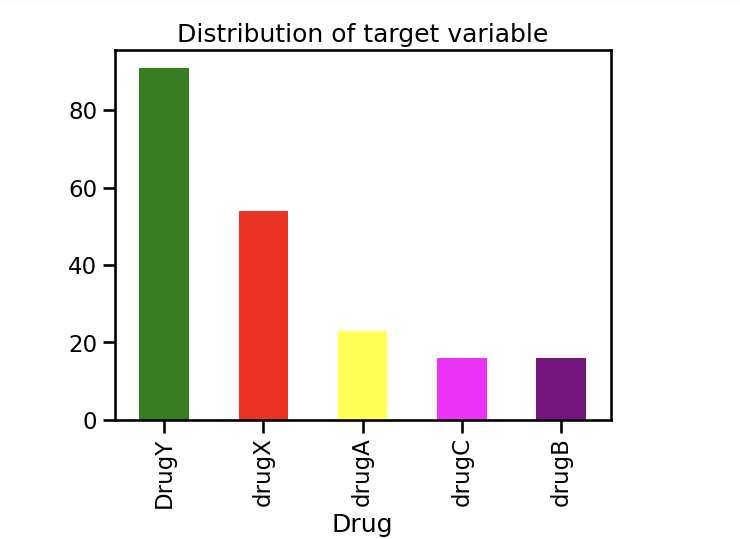

In [5]:
Image("/Users/marcelgrossmann/Documents/Project/MLCoursera/Dataset/target.PNG")

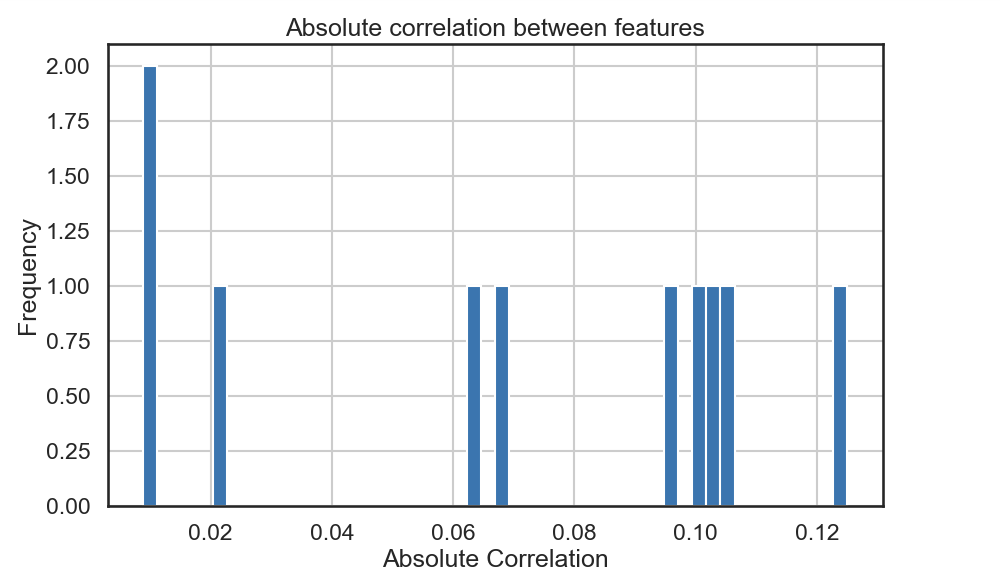

In [3]:
Image("/Users/marcelgrossmann/Documents/Project/MLCoursera/Dataset/correlation.png")

### Models.

###                                                   Models Coefficients

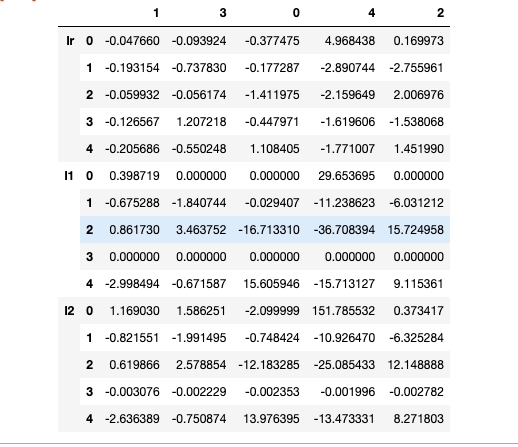

In [5]:
Image("/Users/marcelgrossmann/Documents/Project/MLCoursera/Dataset/coefficient.png")

In the display above, lr, l1, and l2 refers to three different models. lr being a simeple logistic regression model. l2 a logistic regression model with cross_validation using l1 penalty and l2 a logistic regression with cross_validation using l2 penalty.

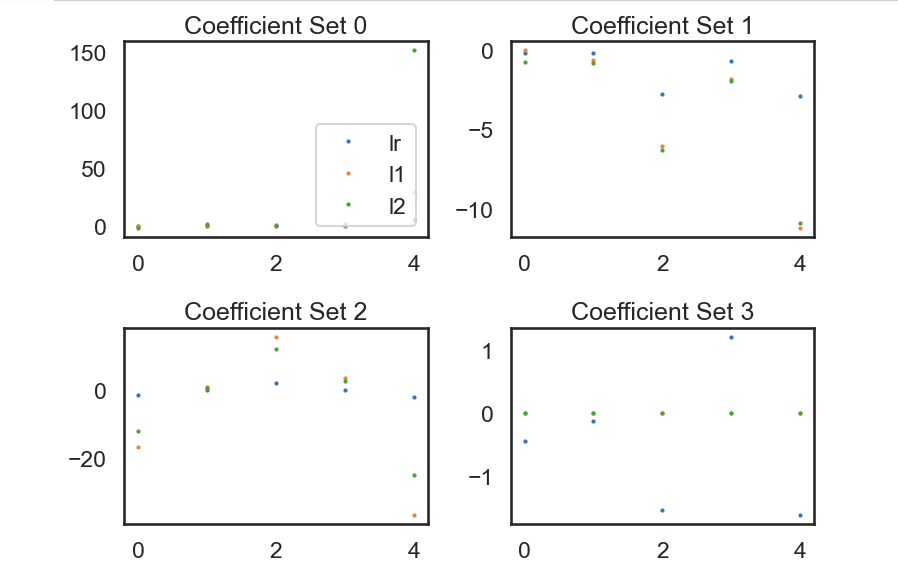

In [6]:
Image("/Users/marcelgrossmann/Documents/Project/MLCoursera/Dataset/coefficient_set.png")

### Predictions for the three different models lr, l1 and l2

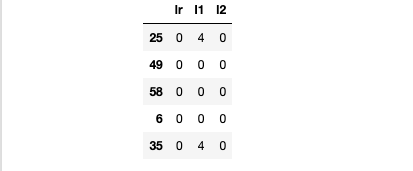

In [7]:
Image("/Users/marcelgrossmann/Documents/Project/MLCoursera/Dataset/Prediction.png")

### Performant metric

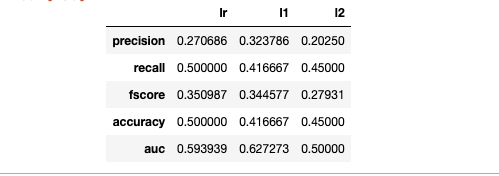

In [8]:
Image("/Users/marcelgrossmann/Documents/Project/MLCoursera/Dataset/Metric.png")

### Confusion matric.

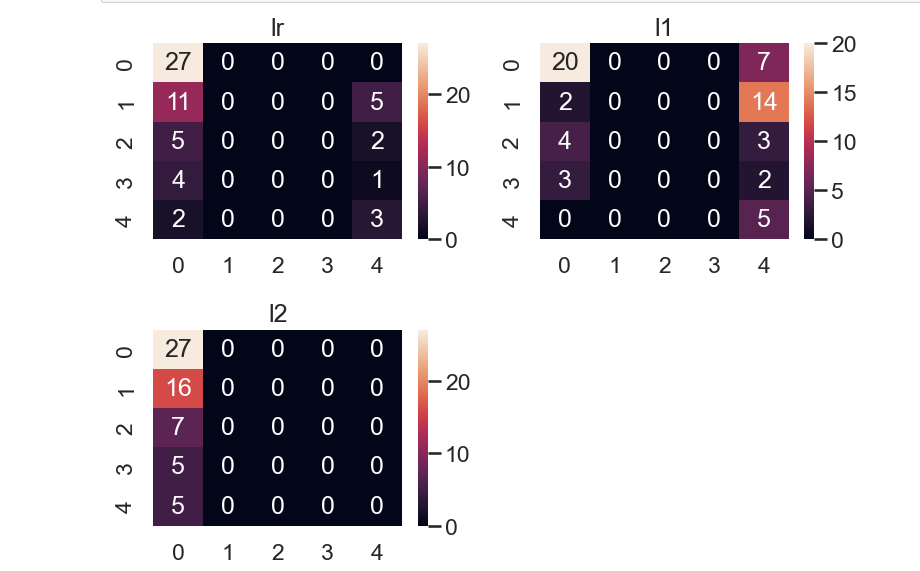

In [11]:
Image("/Users/marcelgrossmann/Documents/Project/MLCoursera/Dataset/confusion_matic.png")

In the matric above, the columns indicate the ground truth values whereas the rows indicate the predicted values for the three different models.

### Key points.

* lr has and overall performant more than the rest of the modols followed by l1.
* In general, Logistic Regression did poorly in classifying the drugs in to different categories.
* DrugY is more likely to be predicted for patients based on the given features than any other drug.

### Challenges.

* 75 % of the dataset are made up of objects which needed to be transformed.

### Feature work.

More work is yet to be done to help improve the prediction score. The following are possible action that would be taken to help
increase the model performance.

* Feature extraction: Feature extraction could help increase the model performance since some of these hidden features could help the model learn hidden pattern from the dataset.
* Investigate with different algorithms: Trying other algorithms like Decision Tree, Support Vector Machine and techniques like ensembles could help improve the model performance.